# CAR PRICE PREDICTION WITH MACHINE LEARNING



### The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,KFold 
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\oasis\codes\car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

##### There are no null values present in the dataset.

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.describe(include="O")

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


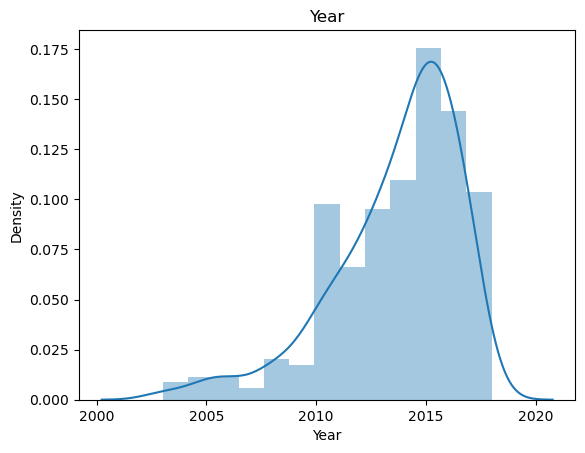

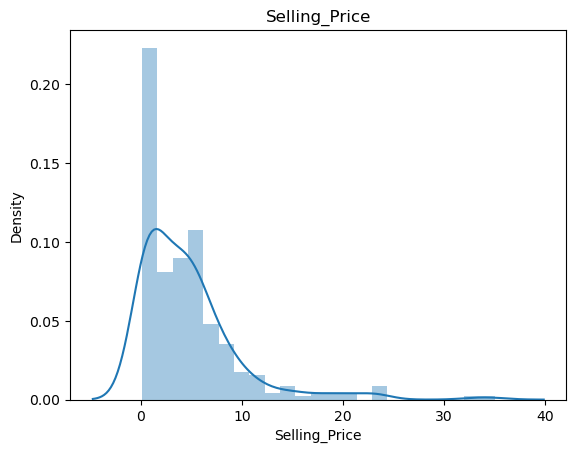

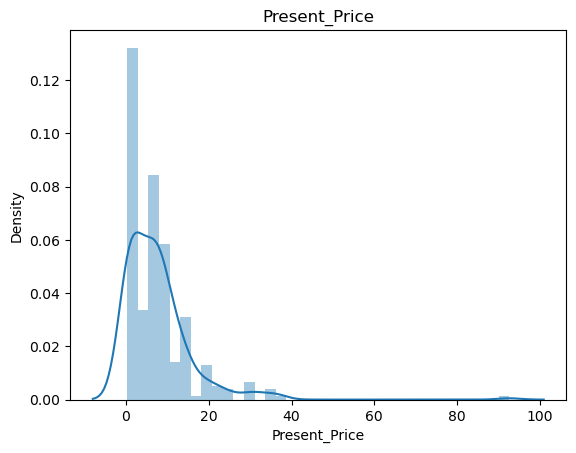

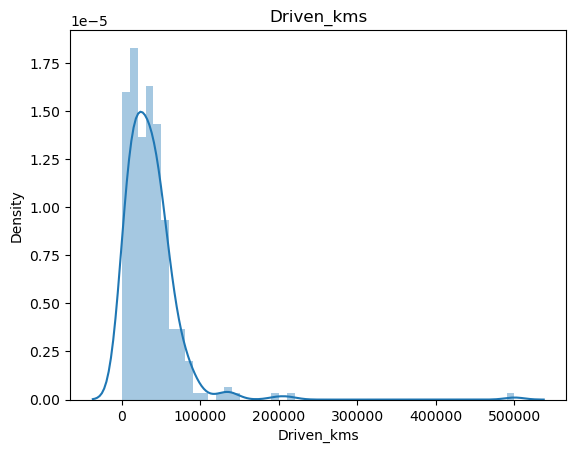

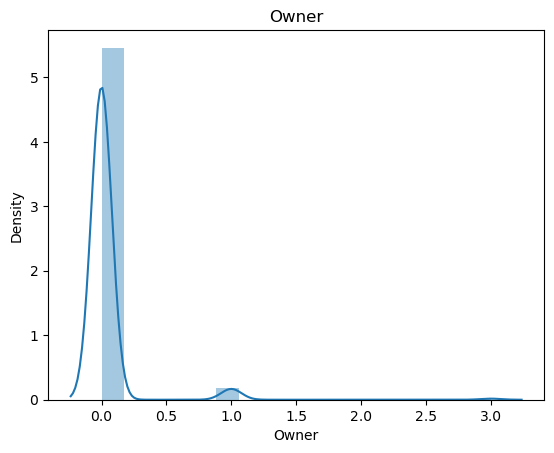

In [8]:
for i in df.select_dtypes(exclude="O").columns:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

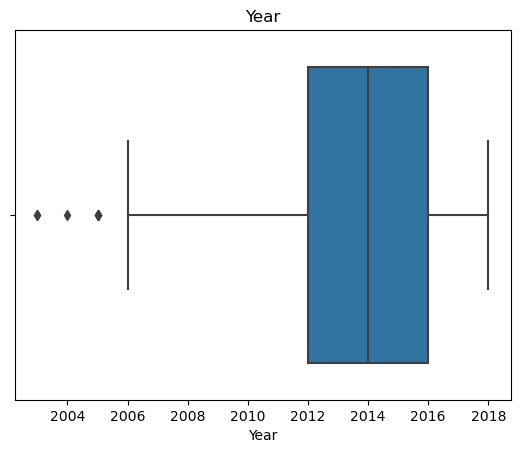

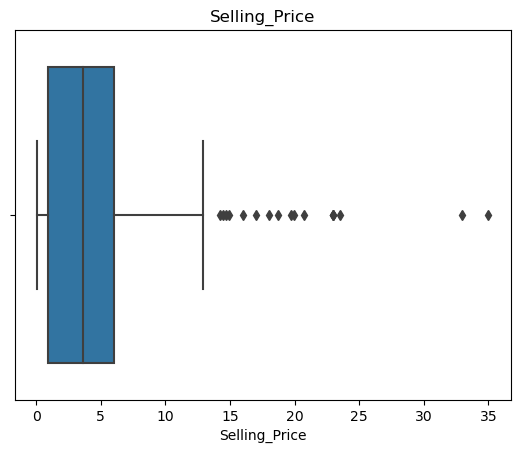

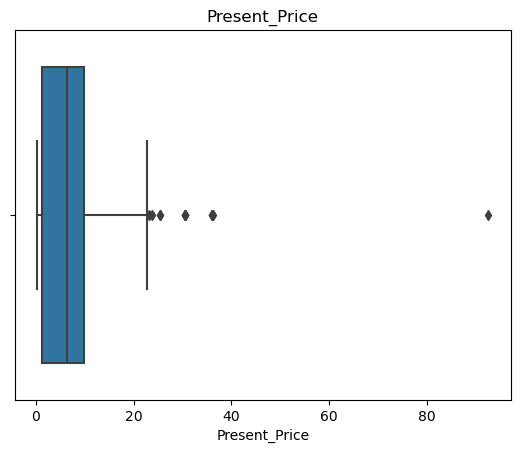

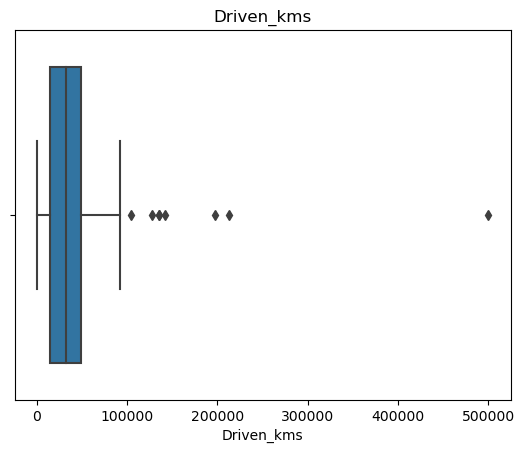

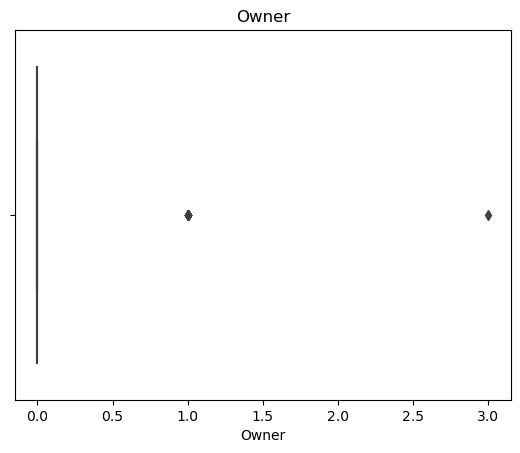

In [9]:
for i in df.select_dtypes(exclude="O").columns:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [10]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
ul = q3+(1.5*iqr)
ll = q1-(1.5*iqr)
print(df[((df<ll) | (df>ul)).any(axis=1)].shape)
print(df[~((df<ll) | (df>ul)).any(axis=1)].shape)

(37, 9)
(264, 9)


#### As we can see that since there are only 37 outliers ,so we can continue the process without deleting it.

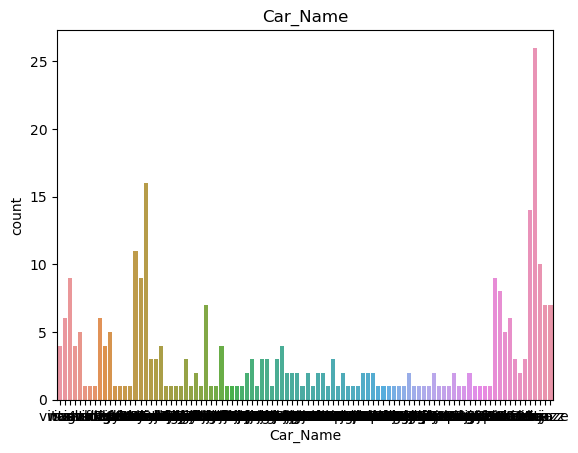

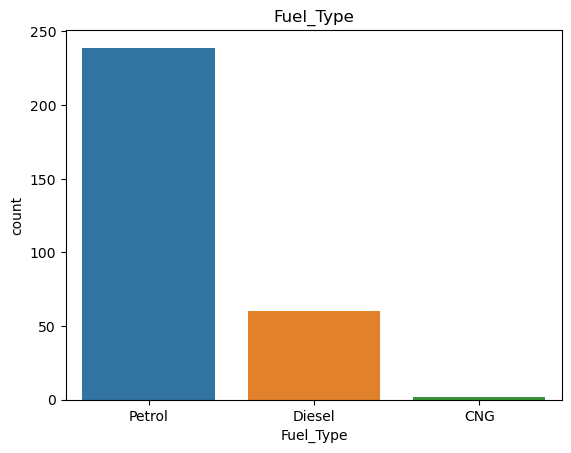

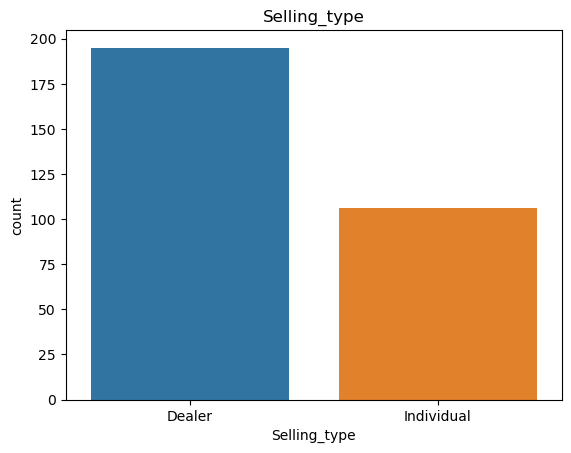

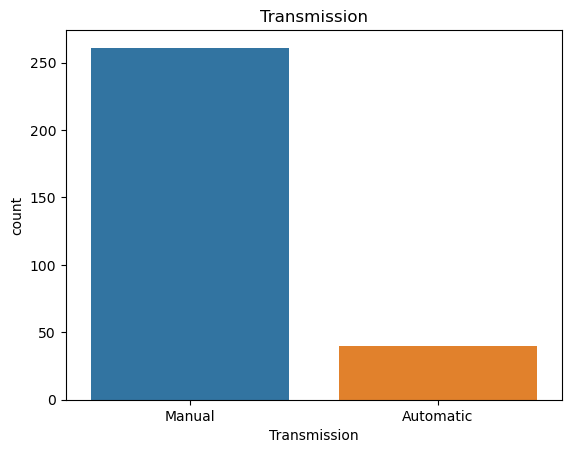

In [11]:
for i in df.select_dtypes(include="O").columns:
    sns.countplot(x=df[i])
    plt.title(i)
    plt.show()

In [12]:
df["Car_Name"].nunique()

98

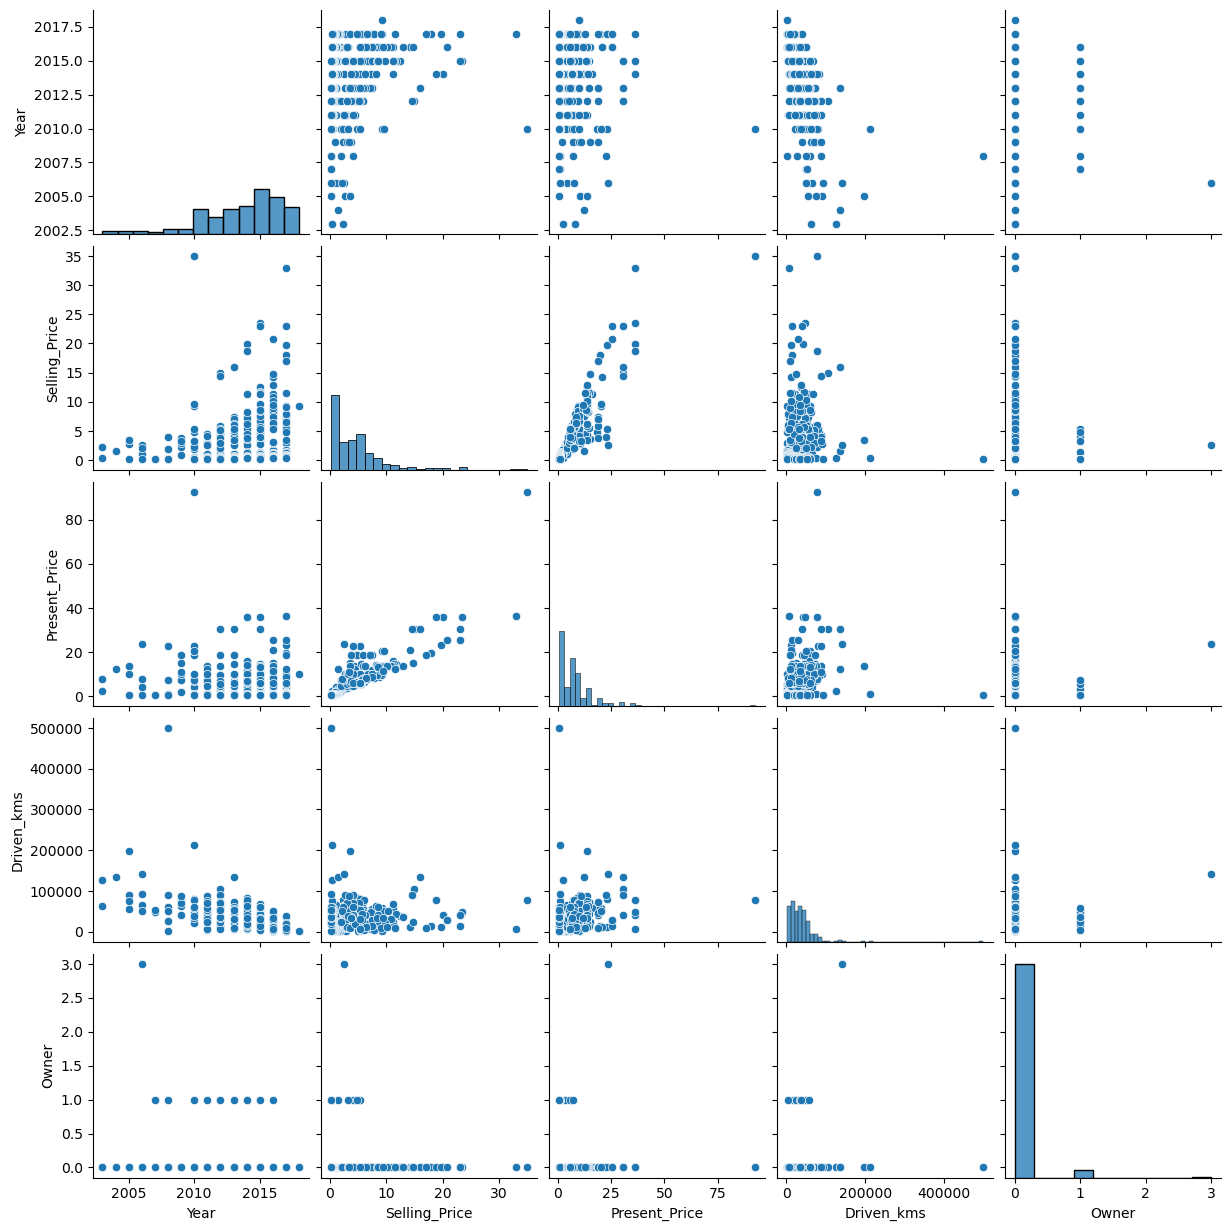

In [13]:
sns.pairplot(df)
plt.show()

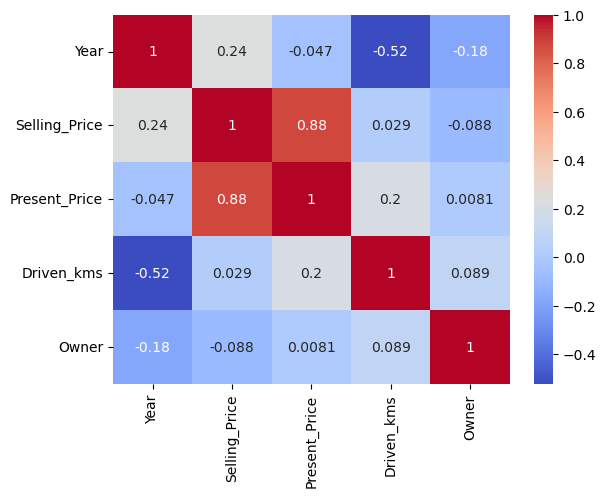

In [14]:
custom_cmap = 'coolwarm'

sns.heatmap(df.corr(), annot=True, cmap=custom_cmap)
plt.show()

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
for i in ("Present_Price","Driven_kms"):
    sc = StandardScaler()
    df[i] = sc.fit_transform(df[[i]])

In [17]:
for i in ("Car_Name","Fuel_Type","Selling_type","Transmission"):
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [18]:
x = df.drop("Selling_Price",axis=1)
y = df["Selling_Price"]

In [19]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,random_state=10,test_size=0.20)
print('Shape of X Train:',xtrain.shape)
print('Shape of X Test:',xtest.shape)
print('Shape of Y Train:',ytrain.shape)
print('Shape of Y Test:',ytest.shape)


Shape of X Train: (240, 8)
Shape of X Test: (61, 8)
Shape of Y Train: (240,)
Shape of Y Test: (61,)


In [20]:
col = pd.MultiIndex.from_product([["Train","Test"],["RMSE","MAPE"]])
modelscore = pd.DataFrame(columns=col)
modelscore.index.name = "Model Name"

In [21]:
def score_cal(model_df,model_name,model,x,y):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,random_state=10,test_size=0.20)
    xtrain,xtest,ytrain,ytest
    model.fit(xtrain,ytrain)
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    train_rmse = mean_squared_error(ytrain,ypred_train,squared=False)
    train_mape = mean_absolute_percentage_error(ytrain,ypred_train)
    test_rmse = mean_squared_error(ytest,ypred_test,squared=False)
    test_mape = mean_absolute_percentage_error(ytest,ypred_test)
    model_df.loc[model_name,:] = [train_rmse,train_mape,test_rmse,test_mape]
    return model_df

#### Linear Regression

In [22]:
lr = LinearRegression()
score_cal(modelscore,"Linear Regression",lr,x,y)

Train                Test          
                       RMSE      MAPE      RMSE      MAPE
Model Name                                               
Linear Regression  1.669081  1.111439  2.268912  2.152343

#### Decision Tree

In [23]:
dt = DecisionTreeRegressor(random_state=10)
score_cal(modelscore,"Decision Tree",dt,x,y)

Train                Test          
                       RMSE      MAPE      RMSE      MAPE
Model Name                                               
Linear Regression  1.669081  1.111439  2.268912  2.152343
Decision Tree           0.0       0.0  1.648116  0.205194

#### Decision Tree-Tuned

In [24]:
params = {"max_depth":range(21),"min_samples_split":range(10)}
dt = DecisionTreeRegressor(random_state=10)
gd = GridSearchCV(dt,params,cv=5)
gd.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=10),
             param_grid={'max_depth': range(0, 21),
                         'min_samples_split': range(0, 10)})

In [25]:
gd.best_params_

{'max_depth': 10, 'min_samples_split': 1}

In [26]:
dt = DecisionTreeRegressor(max_depth=10,min_samples_split=1,random_state=10)
score_cal(modelscore,"Decision Tree-Tuned",dt,x,y)

Train                Test          
                         RMSE      MAPE      RMSE      MAPE
Model Name                                                 
Linear Regression    1.669081  1.111439  2.268912  2.152343
Decision Tree             0.0       0.0  1.648116  0.205194
Decision Tree-Tuned  0.078681  0.012383  1.602743  0.204601

#### Random Forest

In [27]:
rf = RandomForestRegressor(random_state=10)
score_cal(modelscore,"Random Forest",rf,x,y)

Train                Test          
                         RMSE      MAPE      RMSE      MAPE
Model Name                                                 
Linear Regression    1.669081  1.111439  2.268912  2.152343
Decision Tree             0.0       0.0  1.648116  0.205194
Decision Tree-Tuned  0.078681  0.012383  1.602743  0.204601
Random Forest        0.589815  0.063168  1.575734  0.158243

#### Random Forest-Tuned

In [28]:
params = {"max_depth":range(10),"min_samples_split":range(10)}
rf = RandomForestRegressor(random_state=10)
gd = GridSearchCV(rf,params,cv=5)
gd.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10),
             param_grid={'max_depth': range(0, 10),
                         'min_samples_split': range(0, 10)})

In [29]:
gd.best_params_

{'max_depth': 7, 'min_samples_split': 1}

In [30]:
rf = RandomForestRegressor(max_depth=7,min_samples_split=1,random_state=10)
score_cal(modelscore,"Random Forest-Tuned",rf,x,y)

Train                Test          
                         RMSE      MAPE      RMSE      MAPE
Model Name                                                 
Linear Regression    1.669081  1.111439  2.268912  2.152343
Decision Tree             0.0       0.0  1.648116  0.205194
Decision Tree-Tuned  0.078681  0.012383  1.602743  0.204601
Random Forest        0.589815  0.063168  1.575734  0.158243
Random Forest-Tuned  0.616703  0.083077  1.599479  0.159309

#### AdaBoost

In [31]:
adb = AdaBoostRegressor(random_state=10)
score_cal(modelscore,"AdaBoost",adb,x,y)

Train                Test          
                         RMSE      MAPE      RMSE      MAPE
Model Name                                                 
Linear Regression    1.669081  1.111439  2.268912  2.152343
Decision Tree             0.0       0.0  1.648116  0.205194
Decision Tree-Tuned  0.078681  0.012383  1.602743  0.204601
Random Forest        0.589815  0.063168  1.575734  0.158243
Random Forest-Tuned  0.616703  0.083077  1.599479  0.159309
AdaBoost             0.978849  0.839012  1.938395  1.117098

#### Gradient Boosting

In [32]:
gdb = GradientBoostingRegressor(random_state=10)
score_cal(modelscore,"Gradient Boosting",gdb,x,y)

Train                Test          
                         RMSE      MAPE      RMSE      MAPE
Model Name                                                 
Linear Regression    1.669081  1.111439  2.268912  2.152343
Decision Tree             0.0       0.0  1.648116  0.205194
Decision Tree-Tuned  0.078681  0.012383  1.602743  0.204601
Random Forest        0.589815  0.063168  1.575734  0.158243
Random Forest-Tuned  0.616703  0.083077  1.599479  0.159309
AdaBoost             0.978849  0.839012  1.938395  1.117098
Gradient Boosting     0.29411  0.086841  1.386174  0.192761

In [34]:
modelscore.iloc[:,2]-modelscore.iloc[:,1]

Model Name
Linear Regression      1.157474
Decision Tree          1.648116
Decision Tree-Tuned     1.59036
Random Forest          1.512566
Random Forest-Tuned    1.516402
AdaBoost               1.099383
Gradient Boosting      1.299333
dtype: object

In [35]:
modelscore.iloc[:,3]-modelscore.iloc[:,1]

Model Name
Linear Regression      1.040905
Decision Tree          0.205194
Decision Tree-Tuned    0.192218
Random Forest          0.095075
Random Forest-Tuned    0.076231
AdaBoost               0.278086
Gradient Boosting       0.10592
dtype: object

##### From all the above taken models AdaBoost is  giving the better result, As we can see that the minimum error in all three cases(train,test and overall). So we can conclude that with the help of AdaBoost we can solve the problem in the future predictions.